In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
gbm_model=GradientBoostingRegressor()
gbm_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [5]:
y_pred=gbm_model.predict(X_test)

In [6]:
np.sqrt(mean_squared_error(y_test,y_pred))

350.93101618974407

## Model Tunning 

In [7]:
gbm_params={
    "learning_rate":[0.001,0.01,0.1,0.2],
    "max_depth":[3,5,8,50,100],
    "n_estimators":[200,500,1000,2000],
    "subsample":[1,0.5,0.75],
}

In [8]:
gbm=GradientBoostingRegressor()
gbm_cv_model=GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2 )
gbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [52]:
gbm_cv_model.best_params_
lr=gbm_cv_model.best_params_["learning_rate"]
max_depth=gbm_cv_model.best_params_["max_depth"]
n_est=gbm_cv_model.best_params_["n_estimators"]
subsample=gbm_cv_model.best_params_["subsample"]

In [53]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.5}

In [54]:
gbm_tuned=GradientBoostingRegressor(learning_rate=lr,max_depth=max_depth,n_estimators=n_est,subsample=subsample)

In [55]:
gbm_tuned.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000,
                          subsample=0.5)

In [56]:
y_pred=gbm_tuned.predict(X_test)

In [57]:
np.sqrt(mean_squared_error(y_pred,y_test))

328.95452249348256

In [58]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

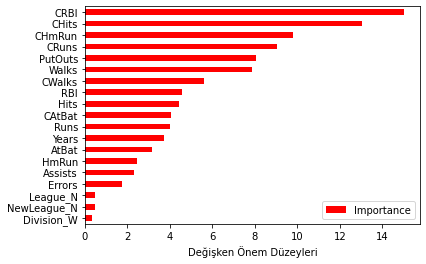

In [59]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")